<a href="https://colab.research.google.com/github/douglasmmachado/MedicineConsumption/blob/master/notebooks/division_approach/4_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 - Clustering process and validation



---



---



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math as m

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

df_h1_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/df_h1_ma.csv"
df_h2_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/df_h2_ma.csv"
df_h3_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/df_h3_ma.csv"
df_h4_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/division_approach/df_h4_ma.csv"



df_h1 = pd.read_csv(df_h1_url)
df_h1['YEAR'] = df_h1['YEAR'].astype(int)
df_h1['MONTH'] = df_h1['MONTH'].astype(int)
df_h1['DATE'] = pd.to_datetime(df_h1['YEAR'].astype(str) + '-' + df_h1['MONTH'].astype(str), format='%Y-%m')

df_h2 = pd.read_csv(df_h2_url)
df_h2['YEAR'] = df_h2['YEAR'].astype(int)
df_h2['MONTH'] = df_h2['MONTH'].astype(int)
df_h2['DATE'] = pd.to_datetime(df_h2['YEAR'].astype(str) + '-' + df_h2['MONTH'].astype(str), format='%Y-%m')

df_h3 = pd.read_csv(df_h3_url)
df_h3['YEAR'] = df_h3['YEAR'].astype(int)
df_h3['MONTH'] = df_h3['MONTH'].astype(int)
df_h3['DATE'] = pd.to_datetime(df_h3['YEAR'].astype(str) + '-' + df_h3['MONTH'].astype(str), format='%Y-%m')

df_h4 = pd.read_csv(df_h4_url)
df_h4['YEAR'] = df_h4['YEAR'].astype(int)
df_h4['MONTH'] = df_h4['MONTH'].astype(int)
df_h4['DATE'] = pd.to_datetime(df_h4['YEAR'].astype(str) + '-' + df_h4['MONTH'].astype(str), format='%Y-%m')

In [4]:
df_h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CODE_ATC        525 non-null    int64         
 1   DATE            525 non-null    datetime64[ns]
 2   HOSPI_CODE_UCD  525 non-null    int64         
 3   LIT_HC          525 non-null    float64       
 4   LIT_HP          525 non-null    float64       
 5   MONTH           525 non-null    int64         
 6   N_UFS           525 non-null    float64       
 7   PN_MEDICAL      525 non-null    float64       
 8   POPULATION      525 non-null    float64       
 9   P_MEDICAL       525 non-null    float64       
 10  QUANTITY        525 non-null    float64       
 11  QUANTITY_MA     525 non-null    float64       
 12  SEJ_MCO         525 non-null    float64       
 13  SEJ_SLD         525 non-null    float64       
 14  SEJ_SSR         525 non-null    float64       
 15  WEEK  

In [5]:
df_h2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CODE_ATC        525 non-null    int64         
 1   DATE            525 non-null    datetime64[ns]
 2   HOSPI_CODE_UCD  525 non-null    int64         
 3   LIT_HC          525 non-null    float64       
 4   LIT_HP          525 non-null    float64       
 5   MONTH           525 non-null    int64         
 6   N_UFS           525 non-null    float64       
 7   PN_MEDICAL      525 non-null    float64       
 8   POPULATION      525 non-null    float64       
 9   P_MEDICAL       525 non-null    float64       
 10  QUANTITY        525 non-null    float64       
 11  QUANTITY_MA     525 non-null    float64       
 12  SEJ_MCO         525 non-null    float64       
 13  SEJ_PSY         525 non-null    float64       
 14  SEJ_SSR         525 non-null    float64       
 15  WEEK  

In [6]:
df_h3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CODE_ATC        525 non-null    int64         
 1   DATE            525 non-null    datetime64[ns]
 2   HOSPI_CODE_UCD  525 non-null    int64         
 3   LIT_HC          525 non-null    float64       
 4   LIT_HP          525 non-null    float64       
 5   MONTH           525 non-null    int64         
 6   N_UFS           525 non-null    float64       
 7   PN_MEDICAL      525 non-null    float64       
 8   POPULATION      525 non-null    float64       
 9   P_MEDICAL       525 non-null    float64       
 10  QUANTITY        525 non-null    float64       
 11  QUANTITY_MA     525 non-null    float64       
 12  SEJ_HAD         525 non-null    float64       
 13  SEJ_MCO         525 non-null    float64       
 14  SEJ_PSY         525 non-null    float64       
 15  SEJ_SL

In [7]:
df_h4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CODE_ATC        525 non-null    int64         
 1   DATE            525 non-null    datetime64[ns]
 2   HOSPI_CODE_UCD  525 non-null    int64         
 3   LIT_HC          525 non-null    float64       
 4   LIT_HP          525 non-null    float64       
 5   MONTH           525 non-null    int64         
 6   N_UFS           525 non-null    float64       
 7   PN_MEDICAL      525 non-null    float64       
 8   POPULATION      525 non-null    float64       
 9   P_MEDICAL       525 non-null    float64       
 10  QUANTITY        525 non-null    float64       
 11  QUANTITY_MA     525 non-null    float64       
 12  SEJ_MCO         525 non-null    float64       
 13  SEJ_PSY         525 non-null    float64       
 14  SEJ_SLD         525 non-null    float64       
 15  SEJ_SS

## 4.1 - Train, Test split

In [9]:
X_h1 = df_h1.drop('DATE',axis=1).copy().values
X_h2 = df_h2.drop('DATE',axis=1).copy().values
X_h3 = df_h3.drop('DATE',axis=1).copy().values
X_h4 = df_h4.drop('DATE',axis=1).copy().values

X_h1_train, X_h1_test = train_test_split(X_h1, test_size = 0.2, random_state=42)
X_h2_train, X_h2_test = train_test_split(X_h2, test_size = 0.2, random_state=42)
X_h3_train, X_h3_test = train_test_split(X_h3, test_size = 0.2, random_state=42)
X_h4_train, X_h4_test = train_test_split(X_h4, test_size = 0.2, random_state=42)

## 4.2 - K-means model with different cluster composition
## &
## 4.3 - Model evaluation

In [10]:
def kmeans_clustering(X, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, init = 'k-means++', n_init=1, max_iter=300, random_state=42)
    model.fit(X)
    return model

In [11]:
def evaluate_kmeans_clustering(X_train, X_test, n_clusters=2, metric='euclidean', verbose = False):
    model = kmeans_clustering(X_train, n_clusters)
    y_pred = model.predict(X_test)
    silhouette = metrics.silhouette_score(X_test, y_pred, metric=metric)
    davies_bouldin = metrics.davies_bouldin_score(X_test, y_pred)
    calinski_harabasz = metrics.calinski_harabasz_score(X_test, y_pred)

    if verbose:
      metrics_string = '#'*10+' Metrics for test split - '+f'{n_clusters} clusters '+'#'*10
      print()
      print('#'*len(metrics_string))
      print(metrics_string)
      print()
      print(f'Silhouette Score: {round(silhouette, 2)}')
      print(f'Davies-Bouldin Score: {round(davies_bouldin, 2)}')
      print(f'Calinski-Harabasz Score: {round(calinski_harabasz, 2)}')
      print()
      print('#'*len(metrics_string))
      print('#'*len(metrics_string))
      print()

    return silhouette, davies_bouldin, calinski_harabasz

In [13]:
def annot_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text = "x={:.1f}, y={:.2f}".format(xmax, ymax)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=60", color="black")  # Set arrow color to black
    kw = dict(xycoords='data', textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94, 0.96), **kw)

In [14]:
def annot_min(x, y, ax=None):
    xmin = x[np.argmin(y)]
    ymin = y.min()
    text_min = "x={:.1f}, y={:.2f}".format(xmin, ymin)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=60", color="black")  # Set arrow color to black
    kw = dict(xycoords='data', textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text_min, xy=(xmin, ymin), xytext=(0.9, 0.3), **kw)

In [12]:
def visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, calinski_scores):

  # Find optimal cluster numbers based on the scores
  s_max = np.argmax(s_scores)+2
  dbs_min = np.argmin(dbs_scores)+2
  calinski_max = np.argmax(calinski_scores)+2

  # Print the best scores and cluster numbers
  string_array = '#'*10 + ' Metrics best performance for different clusters ' + '#'*10
  len_string_array = len(string_array)
  print('-' * len_string_array)
  print('-' * len_string_array)
  print()
  print(string_array)
  print(f'Best score for Silhouette metric: {max(s_scores):.2f} for {s_max} clusters')
  print(f'Best score for Davies Bouldin metric: {min(dbs_scores):.2f} for {dbs_min} clusters')
  print(f'Best score for Calinski metric: {max(calinski_scores):.2f} for {calinski_max} clusters')
  print()
  print('-' * len_string_array)
  print('-' * len_string_array)
  print()

  # Plot Silhouette scores
  x = np.arange(min_clusters, max_clusters+1)

  fig, ax = plt.subplots(figsize=(8, 6))
  ax.plot(x,s_scores)
  ax.set_xlabel('Number of Clusters')
  ax.set_ylabel('Silhouette Score')
  ax.set_title('Silhouette Scores for Different Cluster Numbers')
  ax.set_xticks(np.arange(2, max_clusters, 2))
  annot_max(x, s_scores)
  plt.show()

  # Plot Davies Bouldin Scores
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.plot(x, dbs_scores)
  ax.set_xlabel('Number of Clusters')
  ax.set_ylabel('Davies Bouldin Score')
  ax.set_title('Davies Bouldin Scores for Different Cluster Numbers')
  ax.set_xticks(np.arange(0, max_clusters-2, 2), np.arange(2, max_clusters, 2))
  annot_min(x, dbs_scores, ax=ax)
  plt.show()

  # Plot Calinski scores
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.plot(x,calinski_scores)
  ax.set_xlabel('Number of Clusters')
  ax.set_ylabel('Calinski Score')
  ax.set_title('Calinski Scores for Different Cluster Numbers')
  ax.set_xticks(np.arange(2, max_clusters, 2))
  annot_max(x, calinski_scores)
  plt.show()

### Hospital 1

---------------------------------------------------------------------
---------------------------------------------------------------------

########## Metrics best performance for different clusters ##########
Best score for Silhouette metric: 0.94 for 9 clusters
Best score for Davies Bouldin metric: 0.03 for 9 clusters
Best score for Calinski metric: 33751.32 for 19 clusters

---------------------------------------------------------------------
---------------------------------------------------------------------



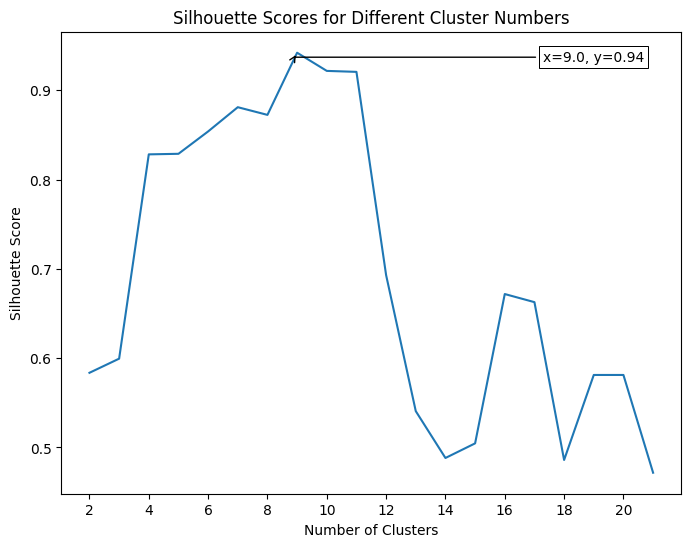

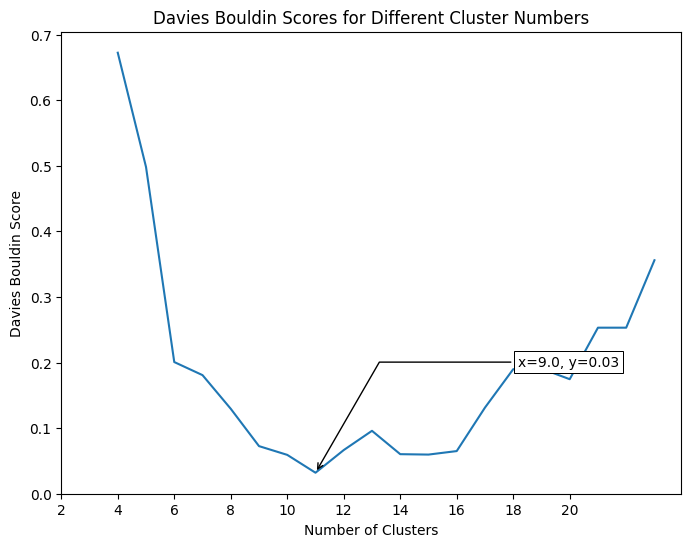

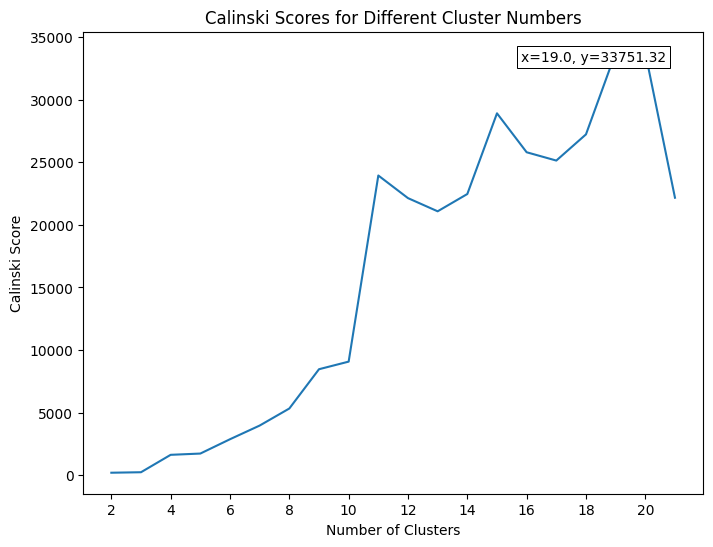

In [18]:
min_clusters = 2
max_clusters = len(df_h1.HOSPI_CODE_UCD.unique())

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)
calinski_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for n_clusters in clusters:

  s_scores[n_clusters-2], dbs_scores[n_clusters-2], calinski_scores[n_clusters-2] =  evaluate_kmeans_clustering(X_h1_train, X_h1_test, n_clusters)

visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, calinski_scores)

### Hospital 2

---------------------------------------------------------------------
---------------------------------------------------------------------

########## Metrics best performance for different clusters ##########
Best score for Silhouette metric: 0.94 for 9 clusters
Best score for Davies Bouldin metric: 0.03 for 9 clusters
Best score for Calinski metric: 33749.77 for 19 clusters

---------------------------------------------------------------------
---------------------------------------------------------------------



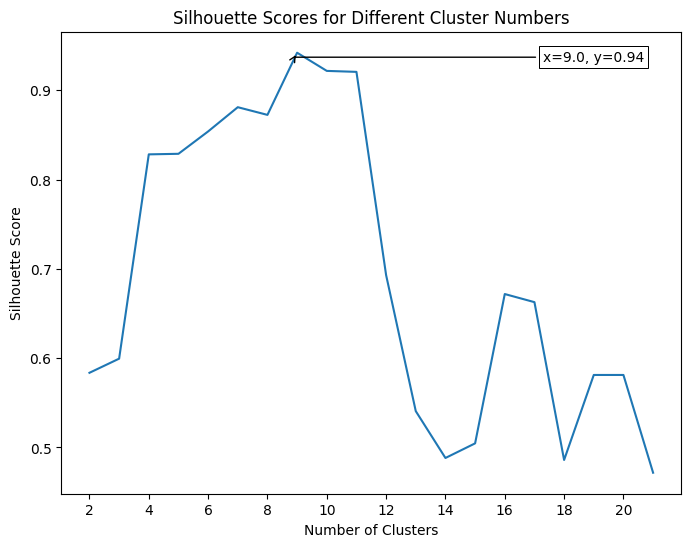

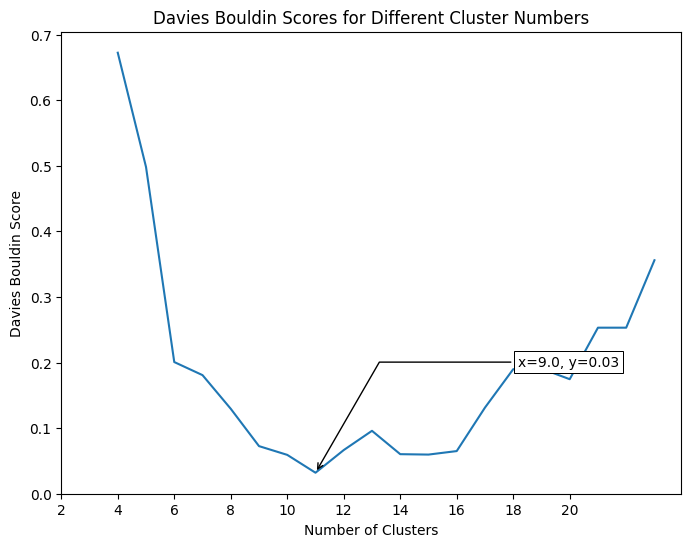

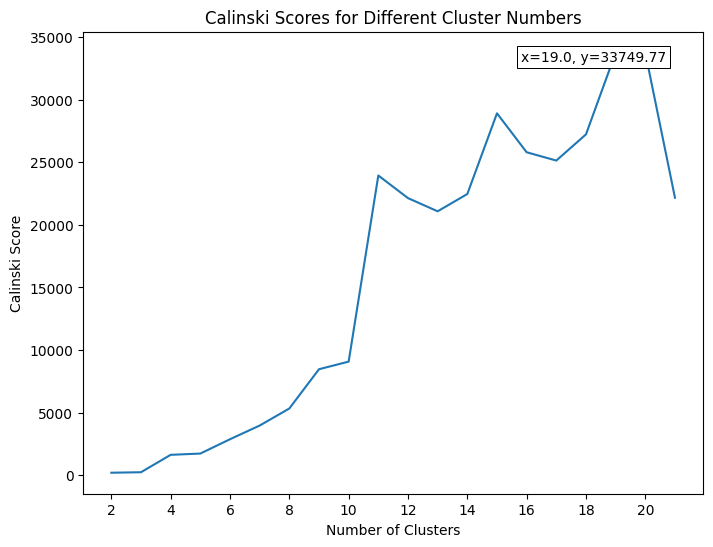

In [19]:
min_clusters = 2
max_clusters = len(df_h2.HOSPI_CODE_UCD.unique())

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)
calinski_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for n_clusters in clusters:

  s_scores[n_clusters-2], dbs_scores[n_clusters-2], calinski_scores[n_clusters-2] =  evaluate_kmeans_clustering(X_h2_train, X_h2_test, n_clusters)

visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, calinski_scores)

### Hospital 3

---------------------------------------------------------------------
---------------------------------------------------------------------

########## Metrics best performance for different clusters ##########
Best score for Silhouette metric: 0.91 for 9 clusters
Best score for Davies Bouldin metric: 0.08 for 9 clusters
Best score for Calinski metric: 35447.25 for 18 clusters

---------------------------------------------------------------------
---------------------------------------------------------------------



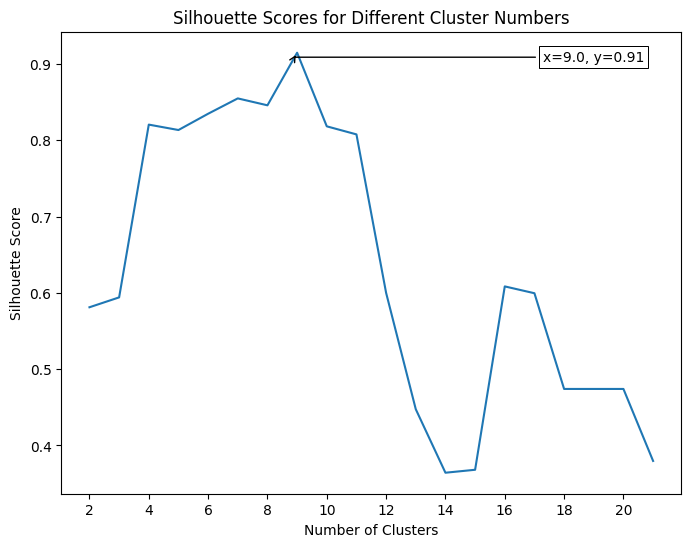

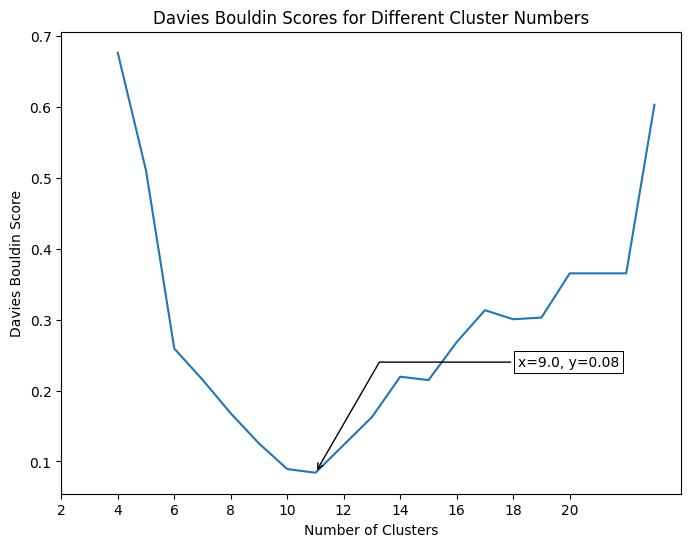

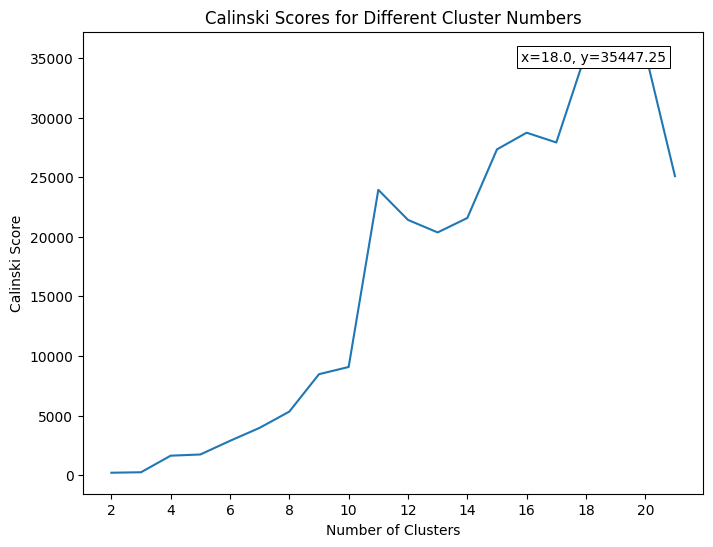

In [20]:
min_clusters = 2
max_clusters = len(df_h3.HOSPI_CODE_UCD.unique())

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)
calinski_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for n_clusters in clusters:

  s_scores[n_clusters-2], dbs_scores[n_clusters-2], calinski_scores[n_clusters-2] =  evaluate_kmeans_clustering(X_h3_train, X_h3_test, n_clusters)

visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, calinski_scores)

### Hospital 4

---------------------------------------------------------------------
---------------------------------------------------------------------

########## Metrics best performance for different clusters ##########
Best score for Silhouette metric: 0.94 for 9 clusters
Best score for Davies Bouldin metric: 0.03 for 9 clusters
Best score for Calinski metric: 33749.77 for 19 clusters

---------------------------------------------------------------------
---------------------------------------------------------------------



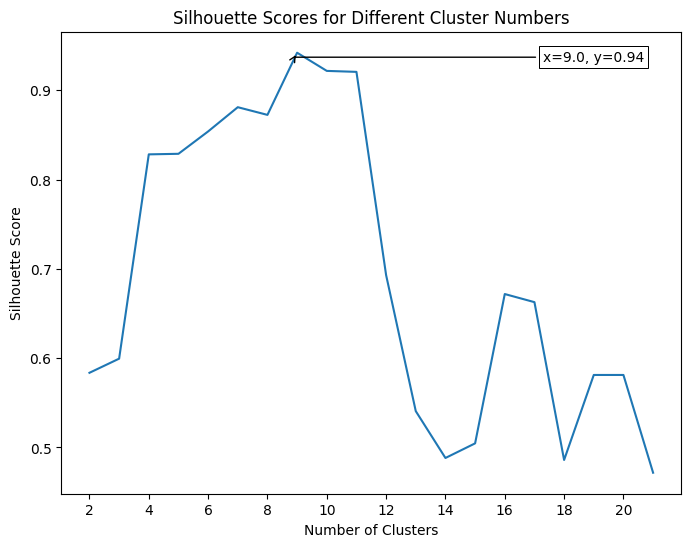

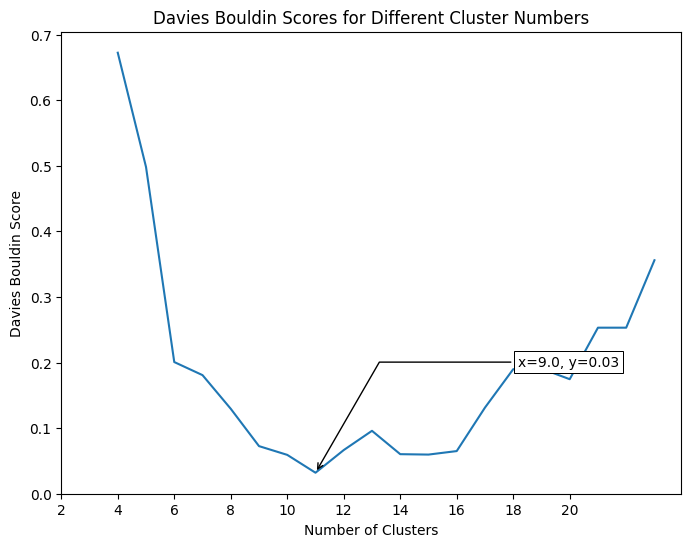

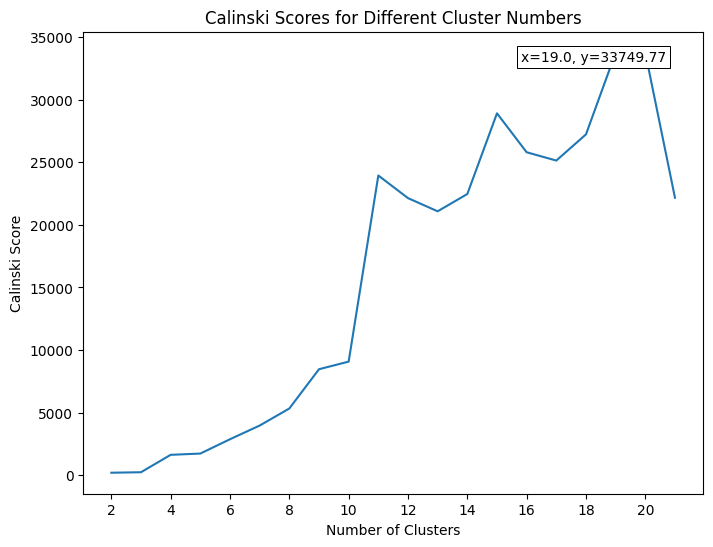

In [21]:
min_clusters = 2
max_clusters = len(df_h4.HOSPI_CODE_UCD.unique())

s_scores = np.zeros(max_clusters-1)
dbs_scores = np.zeros(max_clusters-1)
calinski_scores = np.zeros(max_clusters-1)

clusters = range(2, max_clusters + 1)

for n_clusters in clusters:

  s_scores[n_clusters-2], dbs_scores[n_clusters-2], calinski_scores[n_clusters-2] =  evaluate_kmeans_clustering(X_h4_train, X_h4_test, n_clusters)

visualize_kmeans_clustering_metrics(min_clusters, max_clusters, s_scores, dbs_scores, calinski_scores)

## 4.4 - Fit test

In [1]:
def visu_clusters(df, x1, x2, labels):
  plt.figure(figsize=(12, 6))
  scatter = plt.scatter(df[x1].astype('string'), df[x2], c=labels, s=5, cmap='rainbow')
  plt.xlabel(x1)
  plt.ylabel(x2)
  plt.title(f'Scatter plot of {x1}' + f' over {x2}')
  plt.xticks(rotation=90)
  plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], title="Categories")
  plt.show()

In [2]:
from IPython.display import display

def model_validation(df, X, columns, n_clusters = 2):
  model = KMeans(n_clusters=n_clusters, init = 'k-means++', n_init=1, max_iter=300, random_state=42)
  labels  = model.fit_predict(X)

  df['cluster'] = labels

  description = df.groupby("cluster")[columns]
  n_drugs = description.size()
  description = description.mean()
  description['n_drugs'] = n_drugs
  display(description.head())
  return labels

In [3]:
labels_h1, model_h1 = model_validation(df_h1.copy(), X_h1, ["QUANTITY", "POPULATION", "P_MEDICAL", "PN_MEDICAL", "N_UFS", "LIT_HC", "SEJ_SLD"], n_clusters = 9)
print()
visu_clusters(df_h1.copy(), 'HOSPI_CODE_UCD', 'QUANTITY', labels_h1)

NameError: ignored